# Projette GPCP, pr, sur la base des modèles (analyse EOF)

(1) Reconstruit les données avec les PCs et EOFs des tas. 

(2) Retrouver les PCs des observations GPCP. 


# Importe modules

In [11]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# Functions definition

In [12]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# EOF, tas_mean and PCs

In [13]:
Mean =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_pr_mean.npy').to_xarray().to_array()
Mean = Mean[0,:,:].rename({'variable':'mode'})
Mean

<xarray.DataArray (lat: 128, lon: 256)>
array([[0.16152517, 0.16152517, 0.16152517, ..., 0.16152517, 0.16152517,
        0.16152517],
       [0.08958319, 0.08958319, 0.08958319, ..., 0.08958319, 0.08958319,
        0.08958319],
       [0.14136823, 0.14136823, 0.14136823, ..., 0.1592594 , 0.14136823,
        0.14136823],
       ...,
       [0.70883162, 0.70883162, 0.70883162, ..., 0.65040596, 0.70883162,
        0.70883162],
       [0.64842835, 0.64842835, 0.64842835, ..., 0.64842835, 0.64842835,
        0.64842835],
       [0.55375441, 0.55375441, 0.55375441, ..., 0.55375441, 0.55375441,
        0.55375441]])
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U6 'prmean'

In [14]:
anom =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_pr_anom.npy').to_xarray().to_array()
anom = anom[0,:,:].rename({'variable':'mode'})
anom

<xarray.DataArray (time: 104, lat: 128, lon: 256)>
array([[[ 0.03767297,  0.03767297,  0.03767297, ...,  0.03767297,
          0.03767297,  0.03767297],
        [-0.00178825, -0.00178825, -0.00178825, ..., -0.00178825,
         -0.00178825, -0.00178825],
        [ 0.00872529,  0.00872529,  0.00872529, ...,  0.01125583,
          0.00872529,  0.00872529],
        ...,
        [ 0.14826201,  0.14826201,  0.14826201, ...,  0.1330395 ,
          0.14826201,  0.14826201],
        [ 0.13367983,  0.13367983,  0.13367983, ...,  0.13367983,
          0.13367983,  0.13367983],
        [ 0.09978541,  0.09978541,  0.09978541, ...,  0.09978541,
          0.09978541,  0.09978541]],

       [[ 0.04567717,  0.04567717,  0.04567717, ...,  0.04567717,
          0.04567717,  0.04567717],
        [ 0.00351204,  0.00351204,  0.00351204, ...,  0.00351204,
          0.00351204,  0.00351204],
        [-0.00554633, -0.00554633, -0.00554633, ..., -0.004374  ,
         -0.00554633, -0.00554633],
        ...,
        [ 0.08841286,  0.08841286,  0.08841286, ...,  0.07333628,
          0.08841286,  0.08841286],
        [ 0.03153545,  0.03153545,  0.03153545, ...,  0.03153545,
          0.03153545,  0.03153545],
        [ 0.01646301,  0.01646301,  0.01646301, ...,  0.01646301,
          0.01646301,  0.01646301]],

       [[-0.01348295, -0.01348295, -0.01348295, ..., -0.01348295,
         -0.01348295, -0.01348295],
        [-0.01301677, -0.01301677, -0.01301677, ..., -0.01301677,
         -0.01301677, -0.01301677],
        [-0.0209567 , -0.0209567 , -0.0209567 , ..., -0.01628761,
         -0.0209567 , -0.0209567 ],
        ...,
        [ 0.14866756,  0.14866756,  0.14866756, ...,  0.13362854,
          0.14866756,  0.14866756],
        [ 0.11417336,  0.11417336,  0.11417336, ...,  0.11417336,
          0.11417336,  0.11417336],
        [ 0.02331424,  0.02331424,  0.02331424, ...,  0.02331424,
          0.02331424,  0.02331424]],

       ...,

       [[ 0.0170145 ,  0.0170145 ,  0.0170145 , ...,  0.0170145 ,
          0.0170145 ,  0.0170145 ],
        [ 0.0185883 ,  0.0185883 ,  0.0185883 , ...,  0.0185883 ,
          0.0185883 ,  0.0185883 ],
        [ 0.02006435,  0.02006435,  0.02006435, ...,  0.02134781,
          0.02006435,  0.02006435],
        ...,
        [-0.05738314, -0.05738314, -0.05738314, ..., -0.05573382,
         -0.05738314, -0.05738314],
        [-0.03003571, -0.03003571, -0.03003571, ..., -0.03003571,
         -0.03003571, -0.03003571],
        [ 0.04771174,  0.04771174,  0.04771174, ...,  0.04771174,
          0.04771174,  0.04771174]],

       [[-0.00469551, -0.00469551, -0.00469551, ..., -0.00469551,
         -0.00469551, -0.00469551],
        [-0.00570686, -0.00570686, -0.00570686, ..., -0.00570686,
         -0.00570686, -0.00570686],
        [-0.02999556, -0.02999556, -0.02999556, ..., -0.03522528,
         -0.02999556, -0.02999556],
        ...,
        [-0.06916744, -0.06916744, -0.06916744, ..., -0.06539999,
         -0.06916744, -0.06916744],
        [-0.05865946, -0.05865946, -0.05865946, ..., -0.05865946,
         -0.05865946, -0.05865946],
        [-0.02599379, -0.02599379, -0.02599379, ..., -0.02599379,
         -0.02599379, -0.02599379]],

       [[ 0.01499889,  0.01499889,  0.01499889, ...,  0.01499889,
          0.01499889,  0.01499889],
        [ 0.01312194,  0.01312194,  0.01312194, ...,  0.01312194,
          0.01312194,  0.01312194],
        [-0.01441481, -0.01441481, -0.01441481, ..., -0.01528464,
         -0.01441481, -0.01441481],
        ...,
        [-0.13060006, -0.13060006, -0.13060006, ..., -0.12432146,
         -0.13060006, -0.13060006],
        [-0.12273623, -0.12273623, -0.12273623, ..., -0.12273623,
         -0.12273623, -0.12273623],
        [-0.08021709, -0.08021709, -0.08021709, ..., -0.08021709,
         -0.08021709, -0.08021709]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  *

In [15]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_pr.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_pr.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_pr.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_pr.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_pr.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

eofs = [eof1,eof2,eof3,eof4,eof5]

In [16]:
eofs_combined = xr.combine_nested(eofs, concat_dim='eofs')
#eofs_combined

In [17]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_pr.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_pr.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_pr.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_pr.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_pr.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

PC_df

,pc1,pc2,pc3,pc4,pc5
0,-0.598905,-1.239455,0.711050,0.672013,-0.781647
1,-0.868254,0.334037,0.536939,0.301395,0.102373
2,-0.339239,0.149689,0.629823,0.710258,-1.728189
3,-1.861077,-0.140945,0.776714,0.095668,0.234242
4,1.066018,-0.033796,1.914352,-1.537650,-2.131536
...,...,...,...,...,...
97,-1.419109,0.407206,0.063974,-0.027483,-0.595296
98,0.875636,0.985097,-0.797016,0.825207,0.048749
99,0.340679,0.175393,0.029820,0.582113,0.224817
100,0.467961,0.220148,1.257663,0.345770,0.183680


In [18]:
#pc1_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF1pc_pr.npy')
#pc2_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF2pc_pr.npy')
#pc3_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF3pc_pr.npy')
#pc4_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF4pc_pr.npy')
#pc5_official = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF5pc_pr.npy')

pc1_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF1pc_pr.npy')
pc2_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF2pc_pr.npy')
pc3_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF3pc_pr.npy')
pc4_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF4pc_pr.npy')
pc5_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF5pc_pr.npy')

In [19]:
PCs = [0]*102
for i in range(0,102,1):
    tmp = PC_df.iloc[i].values
    PCs[i] = tmp

PCs

[array([-0.5989046 , -1.23945518,  0.71104952,  0.67201261, -0.78164665]),
 array([-0.86825354,  0.33403701,  0.53693858,  0.30139498,  0.10237314]),
 array([-0.33923875,  0.14968891,  0.6298232 ,  0.71025829, -1.72818862]),
 array([-1.86107742, -0.14094476,  0.77671415,  0.09566779,  0.23424173]),
 array([ 1.06601833, -0.03379592,  1.91435237, -1.53765013, -2.13153576]),
 array([ 0.33635423,  0.4813116 , -0.1264411 ,  0.66882513, -0.54640832]),
 array([-0.67015755, -2.41229019,  0.22536689,  0.39698867, -0.61526232]),
 array([ 0.15801656, -0.00647397, -1.22274397,  0.78481288, -0.26261185]),
 array([ 0.84603078, -1.40208339, -1.01822121, -0.86169281,  1.3311153 ]),
 array([-0.99818027,  0.38329638, -1.14249522,  0.60419091, -0.77840951]),
 array([ 0.00934473, -0.64754449, -1.28317448, -0.14557545, -1.45913908]),
 array([-1.68745478, -0.54244276, -0.25894463, -1.5981197 ,  1.055593  ]),
 array([-0.70540604,  1.69091418, -0.19397639,  0.01585039,  0.75822752]),
 array([-0.11760273, -0.8

# Trouver U_obs : Reconstruciton des données

X_ens = U_ens(pc) * v_ens(eof) 

Compute anomaly : X_obs = X_obs - mean_ens 

X_obs = U_obs * v_ens 

U_obs = X_obs * inv(v_ens)

## Get the GPCP datatset

In [20]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [21]:
path_observation = '/data/home/globc/peatier/obs_data/GPCP/'
filename = 'pr_mon_mean_197901-201912_regrid.nc'
    
# Load data and compute Annual Cycle :
variables = ['pr']
df_obs = load_monthly_clim(path_observation, filename, variables)
#df_obs['pr'] = df_obs['pr']
df_obs

pr
month lat        lon                
1     -88.927735 0.00000    0.023976
                 1.40625    0.026398
                 2.81250    0.026663
                 4.21875    0.028602
                 5.62500    0.028689
...                              ...
12     88.927735 352.96875  0.397433
                 354.37500  0.384588
                 355.78125  0.384481
                 357.18750  0.382383
                 358.59375  0.382303

[393216 rows x 1 columns]

In [22]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256)
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Data variables:
    pr       (lat, lon) float32 0.3159773 0.3089214 ... 0.50588834 0.50602216

## Compute Anomaly

In [23]:
X_obs = obs['pr'] - Mean
X_obs

<xarray.DataArray (lat: 128, lon: 256)>
array([[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
         0.15706771,  0.15700372],
       [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
         0.18271128,  0.18094123],
       [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
         0.07234507,  0.06929519],
       ...,
       [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
        -0.21249814, -0.21213494],
       [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
        -0.14781829, -0.14698121],
       [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
        -0.04786607, -0.04773226]])
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    mode     <U6 'prmean'

## Trouver U_obs

In [24]:
PCs = PC_df.to_xarray().to_array()
PCs

<xarray.DataArray (variable: 5, index: 102)>
array([[-0.5989046 , -0.86825354, -0.33923875, -1.86107742,  1.06601833,
         0.33635423, -0.67015755,  0.15801656,  0.84603078, -0.99818027,
         0.00934473, -1.68745478, -0.70540604, -0.11760273, -0.67081708,
        -0.56416909,  1.53177934,  1.94723475,  1.63462608,  0.48736276,
         0.129837  , -0.20454238, -0.29216575,  2.43804064,  0.53242869,
        -0.24444729, -0.34043859,  1.48779178, -1.45593838, -1.8097769 ,
         0.30497269,  1.03761171,  0.72272138,  0.14182325,  0.9030447 ,
        -0.2691418 , -1.54149565,  0.29679501,  1.49902439,  1.93660768,
         0.30942917, -0.70581899, -1.35135988,  1.01338373,  0.02959434,
        -0.44489861, -0.31954693, -0.65818562, -2.20120315, -1.26206287,
         1.5436676 ,  0.96701206, -0.59219078,  0.1130382 , -0.48435762,
         1.71779997,  0.31180646, -1.85241574, -0.34578101,  1.79600648,
         0.61245907,  1.24076809, -1.72729614,  0.60317379, -1.17819484,
        -0.66920445,  0.08170618, -0.61621142,  0.22889938, -0.38408399,
         0.32673613,  0.73265579, -0.63820092,  0.46987379,  1.37560621,
        -0.67467186,  0.65835921, -0.26759438, -2.46467009,  0.58864316,
        -0.20840403, -0.64615608,  0.10994725, -0.50735589, -0.33635698,
         0.51887244, -0.1735966 ,  1.09108217,  0.15119665,  0.3182508 ,
        -1.60358529, -0.43025382, -0.93945487, -0.01480264,  1.42135814,
        -0.75268354, -0.59346294, -1.41910887,  0.87563572,  0.34067882,
         0.46796065,  0.95450294],
       [-1.23945518,  0.33403701,  0.14968891, -0.14094476, -0.03379592,
         0.4813116 , -2.41229019, -0.00647397, -1.40208339,  0.38329638,
        -0.64754449, -0.54244276,  1.69091418, -0.89157387,  0.34308379,
         0.30661033,  0.43173532,  0.54974944, -1.05508797,  0.27463298,
        -1.07667557, -1.13796258,  1.01010123,  0.88712741,  1.06505253,
         0.5208634 ,  2.34695815, -0.09682158, -0.874014  , -0.04663213,
         1.23460241, -2.13704331,  1.52712554,  0.46014599, -0.21331831,
        -1.36856514,  1.07523202,  0.09554494, -0.38099224, -0.81848876,
        -0.4485002 , -0.58780473, -0.54311711,  0.42793239, -1.87828147,
        -0.70307372, -0.69000286, -0.14413833,  0.94922087, -0.40079792,
        -1.91099112,  1.432523  , -1.21661901, -2.59708679, -1.36094502,
         0.61132144, -1.34701737,  0.85767104, -0.02182544,  0.90574904,
         1.17889148,  0.32321718, -0.27507218, -0.54530175,  1.55562615,
        -0.47148824,  1.20455252,  1.44550192,  1.41282918,  0.96138685,
         0.86169177,  0.01678304,  0.64522812,  0.26676675, -1.00126269,
         0.67458835, -0.01951697, -0.33704072,  0.71319076, -0.49656012,
        -0.36979861,  0.40401582, -0.01537764, -1.6659251 , -1.042599  ,
         0.43879741,  0.49433176,  0.24442738,  1.37170412, -0.98966905,
        -0.61831231, -0.14554864, -1.91266812,  0.06667508, -1.36826654,
         0.6784377 ,  0.30105142,  0.40720555,  0.98509659,  0.17539334,
         0.2201484 ,  1.99740809],
       [ 0.71104952,  0.53693858,  0.6298232 ,  0.77671415,  1.91435237,
        -0.1264411 ,  0.22536689, -1.22274397, -1.01822121, -1.14249522,
        -1.28317448, -0.25894463, -0.19397639, -0.34838242, -0.09564822,
        -0.17222073,  0.85503307,  0.25603468,  1.1067134 , -0.0818209 ,
        -0.95875199, -1.08258025,  0.84242795,  0.46479093,  0.4760856 ,
        -0.17299757,  0.48707109,  0.23869648,  0.57302681,  0.4601509 ,
        -1.23468177,  1.07378414,  1.38565512,  0.64745146,  0.64812127,
        -0.22773952, -0.26191557, -0.05795703,  0.69631477,  1.0287244 ,
        -0.27339629,  1.144139  ,  1.36846532,  0.42205114,  0.54193912,
        -2.23345717,  0.67395057, -1.90985221,  2.76952808, -1.08848671,
         1.99310424, -0.31984487, -1.07538821, -0.33701612, -0.78689577,
         0.10323374,  0.8043677 ,  2.7497575 , -0.40998971, -0.93357668,
        -1.50942687, -0.54052273, -1.47554097,  0.04937332,  0.94373036,
        -2.06155

In [25]:
X_ens = eof1*PCs[0]+eof2*PCs[1]+eof3*PCs[2]+eof4*PCs[3]+eof5*PCs[4]
#X_ens

In [26]:
X_ens_bis = np.dot(eofs_combined.transpose(),PCs)
X_ens_bis = xr.DataArray(X_ens_bis, dims=['lon','lat','index'])
X_ens_bis

<xarray.DataArray (lon: 256, lat: 128, index: 102)>
array([[[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.00337474,  0.00242121, -0.01389793, ..., -0.01072954,
         -0.02277081, -0.01043989],
        ...,
        [ 0.02210225, -0.01363767,  0.00707603, ..., -0.0142686 ,
         -0.02273911, -0.04030695],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]],

       [[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.00337474,  0.00242121, -0.01389793, ..., -0.01072954,
         -0.02277081, -0.01043989],
        ...,
        [ 0.02210225, -0.01363767,  0.00707603, ..., -0.0142686 ,
         -0.02273911, -0.04030695],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]],

       [[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.00337474,  0.00242121, -0.01389793, ..., -0.01072954,
         -0.02277081, -0.01043989],
        ...,
        [ 0.02210225, -0.01363767,  0.00707603, ..., -0.0142686 ,
         -0.02273911, -0.04030695],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]],

       ...,

       [[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.0048996 ,  0.00185092, -0.01203846, ..., -0.01017116,
         -0.02229519, -0.01214541],
        ...,
        [ 0.02397609, -0.01178211,  0.00647566, ..., -0.01498387,
         -0.02225434, -0.04376451],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]],

       [[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.00337474,  0.00242121, -0.01389793, ..., -0.01072954,
         -0.02277081, -0.01043989],
        ...,
        [ 0.02210225, -0.01363767,  0.00707603, ..., -0.0142686 ,
         -0.02273911, -0.04030695],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]],

       [[-0.00767044, -0.01012078,  0.00259436, ...,  0.00452481,
         -0.00207779,  0.0153892 ],
        [-0.003996  , -0.00129149, -0.00287858, ..., -0.00105764,
         -0.00493143,  0.00575939],
        [ 0.00337474,  0.00242121, -0.01389793, ..., -0.01072954,
         -0.02277081, -0.01043989],
        ...,
        [ 0.02210225, -0.01363767,  0.00707603, ..., -0.0142686 ,
         -0.02273911, -0.04030695],
        [ 0.0300397 , -0.00398368, -0.00196001, ..., -0.01295522,
         -0.02392352, -0.05091373],
        [ 0.01286495, -0.00348158, -0.03518223, ..., -0.01489909,
         -0.02386889, -0.03130533]]])
Dimensions without coordinates: lon, lat, index

In [27]:
eofs_inv = np.linalg.pinv(eofs_combined.transpose())
#eofs_inv = xr.DataArray(eofs_inv, dims=['eofs','lon','lat'])
eofs_inv

array([[[-0.00838015, -0.00850304, -0.02930211, ..., -0.02742576,
         -0.02488669, -0.01202851],
        [ 0.01135708,  0.0109511 ,  0.0248664 , ...,  0.02988859,
          0.00392515, -0.00111259],
        [-0.05482551, -0.03530334, -0.09436803, ..., -0.12789168,
         -0.07970011, -0.00183862],
        [ 0.00763354, -0.01265658, -0.04048135, ..., -0.01764687,
          0.00823586, -0.04475443],
        [-0.05491607, -0.01825886, -0.02586637, ..., -0.09779168,
         -0.04376219,  0.06825008]],

       [[-0.00717552, -0.00633394, -0.02137289, ..., -0.02384131,
         -0.01994208, -0.00842466],
        [ 0.00639284,  0.006083  ,  0.01364064, ...,  0.0187844 ,
          0.0026703 , -0.00181311],
        [-0.05465261, -0.02968098, -0.0780685 , ..., -0.12493596,
         -0.08204414,  0.00157832],
        [ 0.0111108 , -0.00730814, -0.0283294 , ..., -0.01033528,
          0.00448346, -0.03914243],
        [-0.05105977, -0.01739632, -0.02890408, ..., -0.09462618,
         -0.04

In [28]:
U_ens = np.dot(eofs_inv,X_ens.transpose('lon','lat','index'))
#U_ens = U_ens.mean(dim=['lat','lon'])#.transpose()
U_ens

array([[[[-5.98904604e-01, -8.68253545e-01, -3.39238750e-01, ...,
           3.40678820e-01,  4.67960649e-01,  9.54502940e-01],
         [-7.58344019e-01, -9.99753625e-01, -2.43989872e-01, ...,
           3.78990108e-01,  5.52663867e-01,  1.20483837e+00],
         [-1.11865365e+00, -8.63197407e-01, -4.33125814e-01, ...,
           3.34189236e-01,  3.20843322e-01,  1.74823744e+00],
         ...,
         [-8.43212342e-01, -9.14197676e-01, -4.23552372e-01, ...,
           3.70184739e-01,  4.35965701e-01,  1.33771817e+00],
         [-7.15609714e-01, -7.98351512e-01, -3.56956029e-01, ...,
           3.12296079e-01,  4.12900907e-01,  1.12100876e+00],
         [-6.78117374e-01, -6.56492466e-01, -5.85916088e-01, ...,
           2.58672940e-01,  3.22158425e-01,  1.02390495e+00]],

        [[-1.23945518e+00,  3.34037013e-01,  1.49688909e-01, ...,
           1.75393338e-01,  2.20148396e-01,  1.99740809e+00],
         [-1.31818166e+00,  4.27591473e-01,  1.70624074e-01, ...,
           1.52904178e

In [29]:
U_ens = xr.DataArray(U_ens, dims=['lon','eofs','lon2', 'index'])
#U_ens_avg = U_ens.mean(dim=['lon','lon2']).transpose()
U_ens_avg = U_ens[0,:,0,:].transpose()
U_ens_avg

<xarray.DataArray (index: 102, eofs: 5)>
array([[-0.5989046 , -1.23945518,  0.71104952,  0.67201261, -0.78164665],
       [-0.86825354,  0.33403701,  0.53693858,  0.30139498,  0.10237314],
       [-0.33923875,  0.14968891,  0.6298232 ,  0.71025829, -1.72818862],
       [-1.86107742, -0.14094476,  0.77671415,  0.09566779,  0.23424173],
       [ 1.06601833, -0.03379592,  1.91435237, -1.53765013, -2.13153576],
       [ 0.33635423,  0.4813116 , -0.1264411 ,  0.66882513, -0.54640832],
       [-0.67015755, -2.41229019,  0.22536689,  0.39698867, -0.61526232],
       [ 0.15801656, -0.00647397, -1.22274397,  0.78481288, -0.26261185],
       [ 0.84603078, -1.40208339, -1.01822121, -0.86169281,  1.3311153 ],
       [-0.99818027,  0.38329638, -1.14249522,  0.60419091, -0.77840951],
       [ 0.00934473, -0.64754449, -1.28317448, -0.14557545, -1.45913908],
       [-1.68745478, -0.54244276, -0.25894463, -1.5981197 ,  1.055593  ],
       [-0.70540604,  1.69091418, -0.19397639,  0.01585039,  0.75822752],
       [-0.11760273, -0.89157387, -0.34838242,  1.84970771, -0.15295954],
       [-0.67081708,  0.34308379, -0.09564822,  0.69594615,  0.03513911],
       [-0.56416909,  0.30661033, -0.17222073,  0.73010091, -0.55176818],
       [ 1.53177934,  0.43173532,  0.85503307, -1.15023665, -0.77896365],
       [ 1.94723475,  0.54974944,  0.25603468, -2.22476404, -1.51884476],
       [ 1.63462608, -1.05508797,  1.1067134 ,  0.13579736, -0.1841868 ],
       [ 0.48736276,  0.27463298, -0.0818209 ,  0.33283444, -1.2500534 ],
       [ 0.129837  , -1.07667557, -0.95875199,  1.10291373, -0.48801291],
       [-0.20454238, -1.13796258, -1.08258025,  0.78163279, -0.28029449],
       [-0.29216575,  1.01010123,  0.84242795,  0.32623103, -0.65198581],
       [ 2.43804064,  0.88712741,  0.46479093, -1.55128207,  0.41552233],
       [ 0.53242869,  1.06505253,  0.4760856 , -0.12793499, -0.13190231],
       [-0.24444729,  0.5208634 , -0.17299757,  0.06329575,  0.57582811],
       [-0.34043859,  2.34695815,  0.48707109,  0.3461931 ,  1.76950824],
       [ 1.48779178, -0.09682158,  0.23869648, -0.09120304, -0.45925454],
       [-1.45593838, -0.874014  ,  0.57302681,  0.90454058, -0.43387464],
       [-1.8097769 , -0.04663213,  0.4601509 , -1.06037174,  0.31111339],
       [ 0.30497269,  1.23460241, -1.23468177,  1.15879309,  1.02511056],
       [ 1.03761171, -2.13704331,  1.07378414,  0.26675465, -0.86740404],
       [ 0.72272138,  1.52712554,  1.38565512, -0.93309026,  0.47051068],
       [ 0.14182325,  0.46014599,  0.64745146,  0.75529674,  0.7808765 ],
       [ 0.9030447 , -0.21331831,  0.64812127,  0.2820088 ,  1.41872448],
       [-0.2691418 , -1.36856514, -0.22773952,  1.8369475 , -1.68460174],
       [-1.54149565,  1.07523202, -0.26191557,  0.66005935, -0.00832976],
       [ 0.29679501,  0.09554494, -0.05795703,  1.1196937 , -0.55519404],
       [ 1.49902439, -0.38099224,  0.69631477, -0.35430545, -0.89989446],
       [ 1.93660768, -0.81848876,  1.0287244 , -0.47018454,  2.81827743],
       [ 0.30942917, -0.4485002 , -0.27339629,  0.79243058,  0.83933063],
       [-0.70581899, -0.58780473,  1.144139  ,  0.11908625, -0.3843968 ],
       [-1.35135988, -0.54311711,  1.36846532,  0.63790901, -0.86276475],
       [ 1.01338373,  0.42793239,  0.42205114,  0.86956106, -0.31473264],
       [ 0.02959434, -1.87828147,  0.54193912, -0.74464003,  2.43011995],
       [-0.44489861, -0.70307372, -2.23345717, -1.14828211, -1.23316275],
       [-0.31954693, -0.69000286,  0.67395057,  0.5505101 , -0.21148668],
       [-0.65818562, -0.14413833, -1.90985221, -0.4718886 ,  1.1040775 ],
       [-2.20120315,  0.94922087,  2.76952808, -1.49166198,  0.04833931],
       [-1.26206287, -0.40079792, -1.08848671, -0.44183883, -0.50927025],
       [ 1.5436676 , -1.91099112,  1.99310424, -0.43327081,  1.40050639],
       [ 0.96701206,  1.432523  , -0.31984487, -0.23692348, -0.62094306],
       [-0.59219078, -1.21661901, -1.07538821,  0.09115558, -0.70529592],
       [ 0.1130382 , -2.59708679, -0.

In [30]:
df = PC_df
df["pc1_bis"] = U_ens_avg[:,0]
df["pc2_bis"] = U_ens_avg[:,1]
df["pc3_bis"] = U_ens_avg[:,2]
df["pc4_bis"] = U_ens_avg[:,3]
df["pc5_bis"] = U_ens_avg[:,4]
df

,pc1,pc2,pc3,pc4,pc5,pc1_bis,pc2_bis,pc3_bis,pc4_bis,pc5_bis
0,-0.598905,-1.239455,0.711050,0.672013,-0.781647,-0.598905,-1.239455,0.711050,0.672013,-0.781647
1,-0.868254,0.334037,0.536939,0.301395,0.102373,-0.868254,0.334037,0.536939,0.301395,0.102373
2,-0.339239,0.149689,0.629823,0.710258,-1.728189,-0.339239,0.149689,0.629823,0.710258,-1.728189
3,-1.861077,-0.140945,0.776714,0.095668,0.234242,-1.861077,-0.140945,0.776714,0.095668,0.234242
4,1.066018,-0.033796,1.914352,-1.537650,-2.131536,1.066018,-0.033796,1.914352,-1.537650,-2.131536
...,...,...,...,...,...,...,...,...,...,...
97,-1.419109,0.407206,0.063974,-0.027483,-0.595296,-1.419109,0.407206,0.063974,-0.027483,-0.595296
98,0.875636,0.985097,-0.797016,0.825207,0.048749,0.875636,0.985097,-0.797016,0.825207,0.048749
99,0.340679,0.175393,0.029820,0.582113,0.224817,0.340679,0.175393,0.029820,0.582113,0.224817
100,0.467961,0.220148,1.257663,0.345770,0.183680,0.467961,0.220148,1.257663,0.345770,0.183680


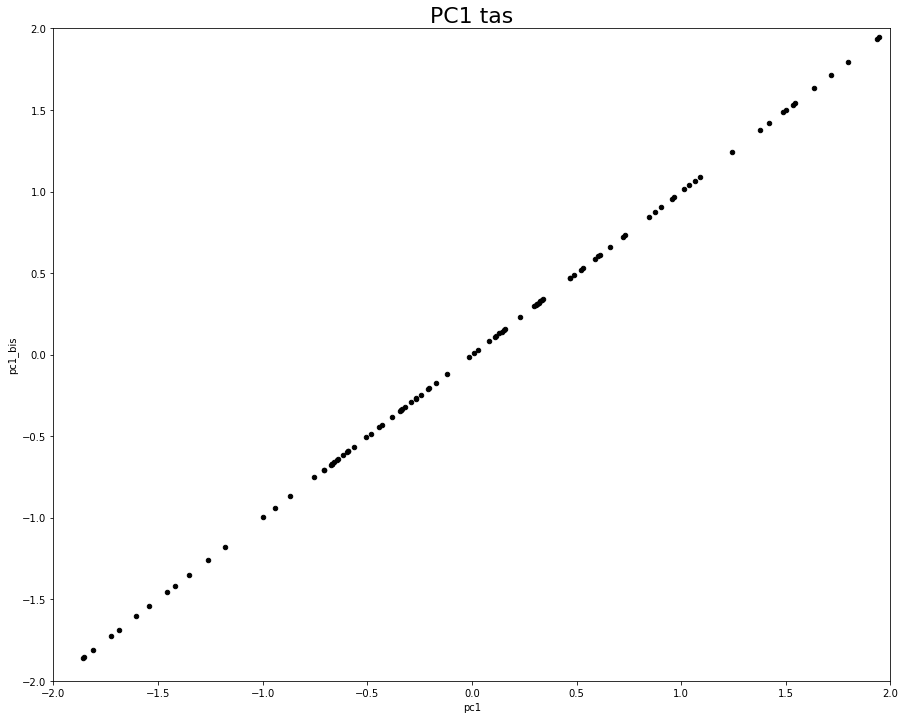

In [31]:
ax = plt.gca()
title = 'PC1 tas'

df.plot(kind='scatter', x='pc1', y='pc1_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-2.0,2.0)
plt.xlim(-2.0,2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

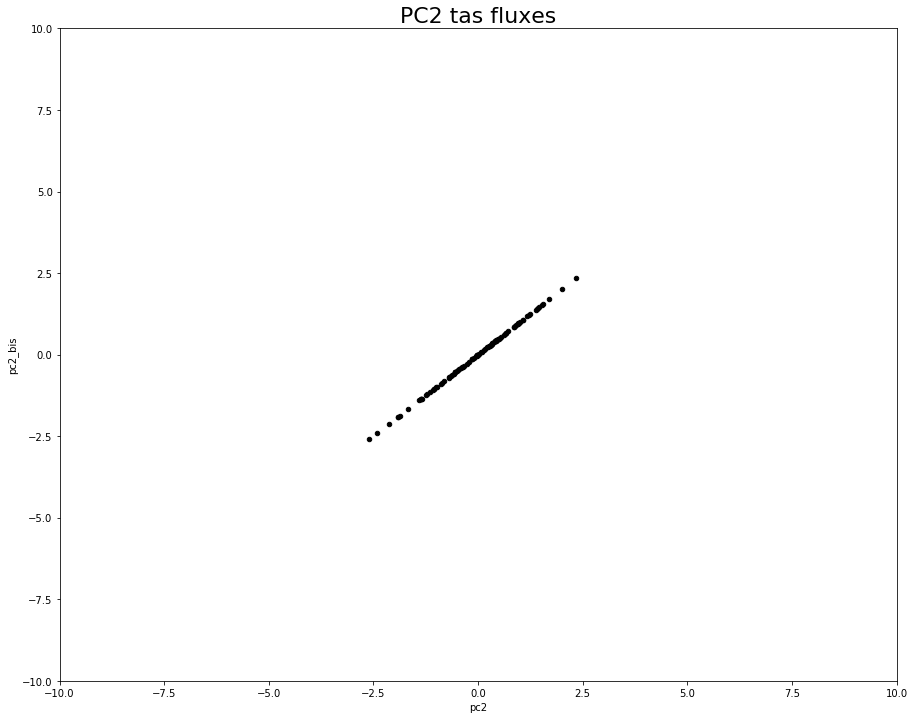

In [32]:
ax = plt.gca()
title = 'PC2 tas fluxes'

df.plot(kind='scatter', x='pc2', y='pc2_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

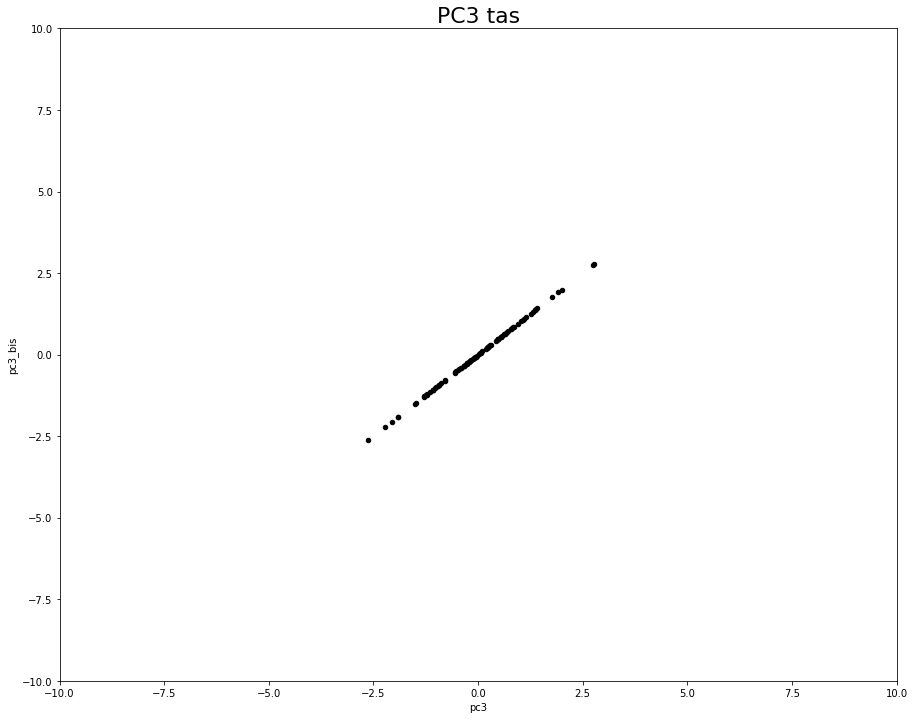

In [33]:
ax = plt.gca()
title = 'PC3 tas'

df.plot(kind='scatter', x='pc3', y='pc3_bis', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
#plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
#plt.ylabel('PC1 SW TOA fluxes', fontsize=18)
#plt.legend(['models', 'CERES dataset'])
plt.title(title, fontsize=22)
plt.ylim(-10,10)
plt.xlim(-10,10)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [34]:
X_obs_bis = X_obs.expand_dims(dim={'dummy':range(0,102,1)})
X_obs_bis

<xarray.DataArray (dummy: 102, lat: 128, lon: 256)>
array([[[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]],

       [[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]],

       [[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]],

       ...,

       [[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]],

       [[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]],

       [[ 0.15445214,  0.14739623,  0.14697318, ...,  0.15810823,
          0.15706771,  0.15700372],
        [ 0.17523787,  0.1695711 ,  0.16813025, ...,  0.18181923,
          0.18271128,  0.18094123],
        [ 0.0664484 ,  0.06401036,  0.06463918, ...,  0.05524396,
          0.07234507,  0.06929519],
        ...,
        [-0.21324594, -0.21400814, -0.21050541, ..., -0.15519234,
         -0.21249814, -0.21213494],
        [-0.1468347 , -0.14641979, -0.14316788, ..., -0.14918607,
         -0.14781829, -0.14698121],
        [-0.04438152, -0.0430155 , -0.04294136, ..., -0.05002483,
         -0.04786607, -0.04773226]]])
Coordinates:
  * dummy    (dummy) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  *

In [35]:
U_obs = np.dot(eofs_inv,X_obs_bis.transpose('lon','lat', 'dummy'))
#U_ens = U_ens.mean(dim=['lat','lon'])#.transpose()
U_obs

array([[[[-0.16117209, -0.16117209, -0.16117209, ..., -0.16117209,
          -0.16117209, -0.16117209],
         [-0.38780432, -0.38780432, -0.38780432, ..., -0.38780432,
          -0.38780432, -0.38780432],
         [ 0.08412306,  0.08412306,  0.08412306, ...,  0.08412306,
           0.08412306,  0.08412306],
         ...,
         [-0.23293948, -0.23293948, -0.23293948, ..., -0.23293948,
          -0.23293948, -0.23293948],
         [-0.08597453, -0.08597453, -0.08597453, ..., -0.08597453,
          -0.08597453, -0.08597453],
         [ 0.69904362,  0.69904362,  0.69904362, ...,  0.69904362,
           0.69904362,  0.69904362]],

        [[ 1.36888651,  1.36888651,  1.36888651, ...,  1.36888651,
           1.36888651,  1.36888651],
         [ 1.21277171,  1.21277171,  1.21277171, ...,  1.21277171,
           1.21277171,  1.21277171],
         [ 1.8958294 ,  1.8958294 ,  1.8958294 , ...,  1.8958294 ,
           1.8958294 ,  1.8958294 ],
         ...,
         [ 2.93321332,  2.93321332

In [36]:
U_obs = xr.DataArray(U_obs, dims=['lon','eofs','lon2', 'dummy'])
U_obs_avg = U_obs[0,:,0,0].transpose()
U_obs_avg

<xarray.DataArray (eofs: 5)>
array([-0.16117209,  1.36888651, -1.34538163, -3.79295765,  2.96219278])
Dimensions without coordinates: eofs

In [37]:
#Save the U_obs_avg 
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/U_obs_pr.npy', U_obs_avg)